<a href="https://colab.research.google.com/github/franklo8/fifa_21_analysis/blob/main/FIFA21_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [ ]:
fifa_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FIFA 21 Analysis/fifa21 raw data v2.csv')
cols_to_use = ['ID', 'Name', 'LongName','Nationality','Age','Club','Height','Weight','Value','Preferred Foot','Skill','Positions','Sprint Speed','Shot Power','PAS','Dribbling','Defending','PHY']
fifa_df2 = fifa_df[cols_to_use]
fifa_df.head()

<ipython-input-79-6dc75d2feb9e>:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FIFA 21 Analysis/fifa21 raw data v2.csv')


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


In [ ]:
fifa_df.isna().sum()

,0
ID,0
Name,0
LongName,0
photoUrl,0
playerUrl,0
...,...
PAS,0
DRI,0
DEF,0
PHY,0


In [ ]:
#remove extra spaces in the club column
fifa_df['Club'] = fifa_df['Club'].str.strip()

In [ ]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [ ]:
# prompt: in the height and weight columns, split the data into numbers and letters

# Extract numeric and unit parts from 'Height' and 'Weight' columns
fifa_df['Height_Value'] = fifa_df['Height'].str.extract('(\d+)').astype(float)

fifa_df['Weight_Value'] = fifa_df['Weight'].str.extract('(\d+)').astype(float)

fifa_df.drop('Height',axis=1,inplace=True)

fifa_df.drop('Weight',axis=1,inplace=True)


Split the fifa_df into sub df

In [ ]:
#All countries
countries_df = fifa_df.drop_duplicates(subset='Nationality', keep='first')[['Nationality',]]
print('Total number of countries in FIFA21: {}'.format(countries_df.shape[0]))

Total number of countries in FIFA21: 164


In [ ]:
#Players who are Goalkeepers
strickers_df = fifa_df[['Name','Positions','Nationality','Club','Total Stats','Base Stats']]
#Create a boolean mask indicating whether each player is a goalkeeper
is_goalkeeper = strickers_df['Positions'].str.contains('GK',case=False)
#Filter the DataFrame to include only goalkeepers
strickers_df = strickers_df[is_goalkeeper]
#Sort the DataFrame by the 'Positions' column in descending order
strickers_df = strickers_df.sort_values(by=['Positions'],ascending=False)
strickers_df

,Name,Positions,Nationality,Club,Total Stats,Base Stats
13193,Marlon Barninho,"GK, RB",Brazil,Vasco da Gama,1094,350
14035,A. Hansen,GK,Denmark,Aalborg BK,1152,352
14161,Luiz Júnior,GK,Brazil,Famalicão,893,338
14151,�. Târnovanu,GK,Romania,FCSB (Steaua),921,339
14140,M. Tørnes,GK,Denmark,Brøndby IF,1120,349
...,...,...,...,...,...,...
7141,Y. Cardinale,GK,France,OGC Nice,1218,388
7135,L. Malagón,GK,Mexico,Club Necaxa,944,360
7130,Alex Craninx,GK,Belgium,Molde FK,1174,368
7126,T. Miller,GK,United States,Minnesota United FC,1066,367


In [ ]:
#Check how many players are from Nigeria
eng_players_df = fifa_df[fifa_df['Nationality']=='Nigeria']
print('Total number of players from Nigeria: {}'.format(eng_players_df.shape[0]))

Total number of players from Nigeria: 129


In [ ]:
clubs_list_df = fifa_df[['Club']].drop_duplicates(subset='Club')
clubs_list_df

,Club
0,FC Barcelona
1,Juventus
2,Atlético Madrid
3,Manchester City
4,Paris Saint-Germain
...,...
13889,Cork City
14309,Shelbourne FC
14540,Harrogate Town
14890,Waterford FC


In [ ]:
# prompt: get me list of players and their attributes in Real Madrid club

barca_players = fifa_df[fifa_df['Club'] == 'FC Barcelona']
print("List of Players in FC Barcelona with their attributes:")
print(barca_players[['Name', 'Age', 'Nationality', 'Positions', 'Value','IR']])


List of Players in FC Barcelona with their attributes:
                    Name  Age         Nationality    Positions    Value   IR
0               L. Messi   33           Argentina   RW, ST, CF  €103.5M  5 ★
9          M. ter Stegen   28             Germany           GK    €110M  3 ★
28          A. Griezmann   29              France   ST, CF, LW   €79.5M  4 ★
40       Sergio Busquets   31               Spain      CDM, CM     €56M  4 ★
55                 Piqué   33               Spain           CB   €32.5M  4 ★
60            Jordi Alba   31               Spain           LB   €49.5M  3 ★
73            C. Lenglet   25              France           CB     €67M  2 ★
80            F. de Jong   23         Netherlands           CM     €81M  3 ★
97             M. Pjanić   30  Bosnia Herzegovina           CM   €51.5M  3 ★
144           O. Dembélé   23              France       LW, RW   €57.5M  3 ★
171            S. Umtiti   26              France           CB     €42M  3 ★
182        Sergi Robe

In [ ]:
# prompt: get me list of players and their attributes in Manchester City club

man_city_players = fifa_df[fifa_df['Club'] == 'Manchester City']
print("List of Players in Manchester City with their attributes:")
print(man_city_players[['Name', 'Age', 'Nationality', 'Positions', 'Value','IR']])


List of Players in Manchester City with their attributes:
                    Name  Age    Nationality    Positions    Value   IR
3           K. De Bruyne   29        Belgium      CAM, CM    €129M  4 ★
17             S. Agüero   32      Argentina           ST   €83.5M  4 ★
18           R. Sterling   25        England       LW, RW  €114.5M  3 ★
22               Ederson   26         Brazil           GK     €92M  2 ★
31        Bernardo Silva   25       Portugal  RW, CAM, CM     €95M  2 ★
33            A. Laporte   26         France           CB   €92.5M  2 ★
62                 Rodri   24          Spain      CDM, CM   €66.5M  2 ★
75             R. Mahrez   29        Algeria       RW, RM     €53M  3 ★
89             K. Walker   30        England           RB   €46.5M  3 ★
133          Fernandinho   35         Brazil      CB, CDM     €11M  3 ★
160        Gabriel Jesus   23         Brazil           ST   €52.5M  2 ★
167         João Cancelo   26       Portugal           RB   €43.5M  2 ★
196   

In [ ]:
# prompt: rate the 2 clubs based on IR of the players

# Calculate the average IR for Real Madrid players
barca_avg_ir = barca_players['IR'].str.replace('★','').astype(np.int64).mean()

# Calculate the average IR for Juventus players
man_city_avg_ir = man_city_players['IR'].str.replace('★','').astype(np.int64).mean()

print(f"FC Barcelona's average IR: {barca_avg_ir:.2f}")
print(f"Manchester City's average IR: {man_city_avg_ir:.2f}")

if barca_avg_ir > man_city_avg_ir:
  print("FC Barcelona has a higher average IR, suggesting a better overall player quality.")
elif man_city_avg_ir > barca_avg_ir:
  print("Manchester City has a higher average IR, suggesting a better overall player quality.")
else:
  print("Both clubs have a similar average IR.")


FC Barcelona's average IR: 2.00
Manchester City's average IR: 1.76
FC Barcelona has a higher average IR, suggesting a better overall player quality.


In [ ]:
# prompt: create a list of all the clubs and there average ratings based on the players IR

club_avg_ir = fifa_df.groupby('Club')['IR'].agg(lambda x: x.str.replace('★', '').astype(float).mean())
club_avg_ir = club_avg_ir.sort_values(ascending=False)
print(club_avg_ir)


Club
FC Bayern München      2.478261
Paris Saint-Germain    2.200000
Real Madrid            2.200000
Juventus               2.178571
Inter                  2.076923
                         ...   
Gaz Metan Mediaş       1.000000
Gangwon FC             1.000000
Fortuna Sittard        1.000000
Fortaleza              1.000000
Śląsk Wrocław          1.000000
Name: IR, Length: 682, dtype: float64


In [ ]:
club_avg_ir.head(10)

,IR
Club,
FC Bayern München,2.478261
Paris Saint-Germain,2.200000
Real Madrid,2.200000
Juventus,2.178571
Inter,2.076923
FC Barcelona,2.000000
Manchester United,1.939394
Napoli,1.923077
Chelsea,1.909091


In [ ]:
#Lets look at a random player
fifa_df2.loc[2900]

,2900
ID,188600
Name,M. Abeid
LongName,Mehdi Abeid
Nationality,Algeria
Age,27
Club,\n\n\n\nFC Nantes
Height,178cm
Weight,77kg
Value,€3.1M
Preferred Foot,Right


# **EXPLORATIONS ACHIEVED USING THE FIFA 21 DATA :-**
>
> - <i>Clustering players by Overall and Potential rating</i>
> - <i>Players Overall vs Potential Rating Distribution</i>
> - <i>Clustering players by Nationaity</i>
> - <i>Top 20 Countries With Maximum Number of Players in FIFA 21</i>
> - <i>Clustering players by International Reputation</i>
> - <i>Representation of The Distribution of International Reputation of Players in FIFA 21</i>
> - <i>Each Different Playing Positions Distribution Among Players in FIFA 21 </i>
> - <i>Plotting Players With Different Playing Positions</i>
> - <i>Top 10 Players in Each Different Playing Positions</i>
     <ol> <i>Top 10 Goalkeepers in FIFA 21</i> </ol>
     <ol> <i> Top 10 Strickers in FIFA 21</i></ol>
     <ol><i>Top 10 Center Backs in FIFA 21</i> </ol>
     <ol><i>Top 10 Left Wings in FIFA 21</i></ol>
     <ol><i>Top 10 Right Wings in FIFA 21</i></ol>
     <ol><i>Top 10 Center Defensive Midfielders in FIFA 21</i></ol>
     <ol><i>Top 10 Center Midfielders in FIFA 21</i></ol>
     <ol><i>Top 10 RIght Backs in FIFA 21</i></ol>
> - <i>Top 10 Shooters in FIFA 21</i>
> - <i>Top 10 Fastest Players in FIFA 21</i>
> - <i>Top 10 Valuable Players in FIFA 21</i>
> - <i>Distributions of Players In Different Age Groups</i>
> _ <i>Players Overall and Potential Rating vs Age in FIFA 21</i>
> - <i>Top 15 Players Key Performance Indication</i>


In [ ]:
#Clustering Players by Nationality
country_count_df = fifa_df['Nationality'].value_counts()
country_count_df

,count
Nationality,
England,1705
Germany,1195
Spain,1065
France,1003
Argentina,943
...,...
Malawi,1
Rwanda,1
São Tomé & Príncipe,1


Top 20 Countries With Maximum Number of Players in FIFA21

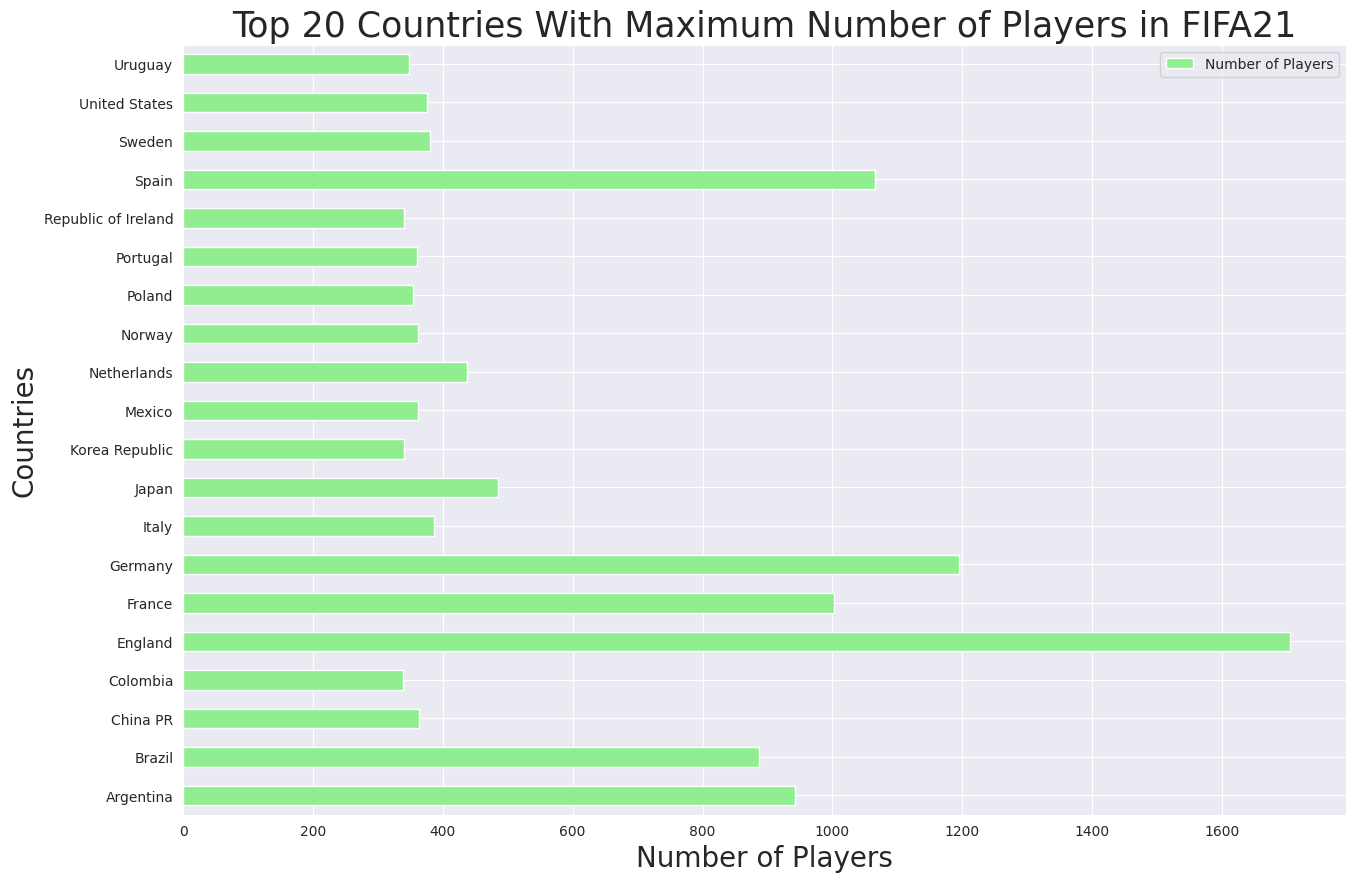

In [ ]:
#Lets plot Top 20 countries with maximum number of players in FIFA21
country_df = pd.DataFrame(country_count_df.head(20))
country_df.sort_values('Nationality',ascending=True).plot(kind='barh',figsize=(15,10),color='lightgreen')
plt.title('Top 20 Countries With Maximum Number of Players in FIFA21', fontsize=25)
plt.ylabel('Countries', fontsize=20)
plt.xlabel('Number of Players', fontsize=20)
plt.legend(['Number of Players']);

In [ ]:
rep_df = fifa_df[['Name', 'IR']].sort_values('IR',ascending=False)
rep_df

,Name,IR
0,L. Messi,5 ★
1,Cristiano Ronaldo,5 ★
45,L. Suárez,5 ★
209,Z. Ibrahimović,5 ★
14,M. Neuer,5 ★
...,...,...
7190,Z. Machach,1 ★
7191,P. Gibaud,1 ★
7192,F. Ballas,1 ★
7193,M. Honsak,1 ★


In [ ]:
rep_df.head(10)

,Name,IR
0,L. Messi,5 ★
1,Cristiano Ronaldo,5 ★
45,L. Suárez,5 ★
209,Z. Ibrahimović,5 ★
14,M. Neuer,5 ★
4,Neymar Jr,5 ★
1635,Cesc Fàbregas,4 ★
49,De Gea,4 ★
192,Coutinho,4 ★
39,G. Chiellini,4 ★


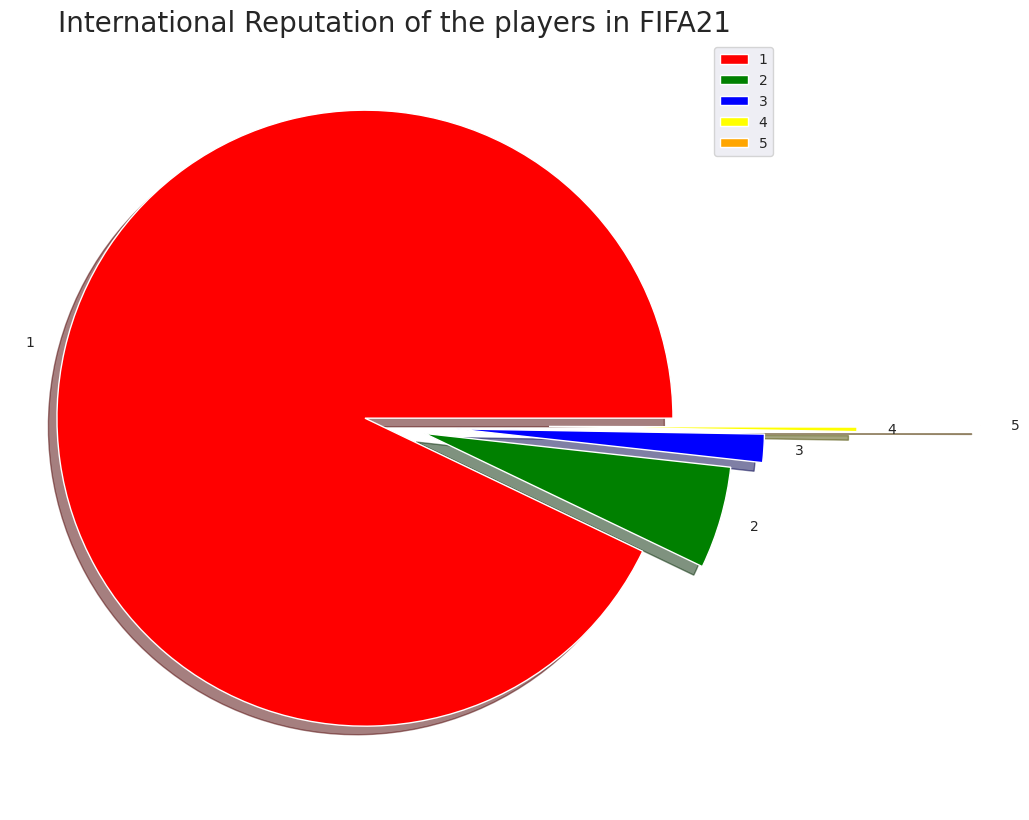

In [ ]:
#Plotting a pie chart to represent the distribution of international reputation of players
labels=['1','2','3','4','5']
sizes=fifa_df['IR'].value_counts()
colors=['red','green','blue','yellow','orange']
explode=[0.1,0.1,0.2,0.5,0.9]
plt.rcParams['figure.figsize']=(10,10)
plt.pie(sizes,labels=labels,colors=colors,explode=explode,shadow=True)
plt.title('International Reputation of the players in FIFA21',fontsize=20)
plt.legend()
plt.show()

In [ ]:
#Top 10 Goalkeepers in FIFA 21
goalkeepers_df = fifa_df[fifa_df['Positions'].str.contains('GK', case=False)]
goalkeepers_df[['LongName','IR','Club','Nationality','Height_Value','Goalkeeping','Wage']].sort_values('IR',ascending=False).head(10)

,LongName,IR,Club,Nationality,Height_Value,Goalkeeping,Wage
14,Manuel Neuer,5 ★,FC Bayern München,Germany,193.0,440,€130K
46,Hugo Lloris,4 ★,Tottenham Hotspur,France,188.0,413,€125K
13,Thibaut Courtois,4 ★,Real Madrid,Belgium,199.0,420,€250K
262,Gianluigi Buffon,4 ★,Juventus,Italy,192.0,396,€41K
49,David De Gea Quintana,4 ★,Manchester United,Spain,192.0,418,€150K
1892,Joe Hart,3 ★,Tottenham Hotspur,England,196.0,363,€50K
672,Nahuel Guzmán,3 ★,Tigres U.A.N.L.,Argentina,193.0,387,€40K
341,Jasper Cillessen,3 ★,Valencia CF,Netherlands,185.0,397,€33K
1254,Diego López Rodríguez,3 ★,RCD Espanyol,Spain,196.0,370,€5K
208,Steve Mandanda,3 ★,Olympique de Marseille,France,185.0,405,€28K


In [ ]:
#Top 10 Strickers in FIFA 21
strickers_df = fifa_df[fifa_df['Positions'].str.contains('ST', case=False)]
strickers_df[['LongName','IR','Club','Nationality','Shot Power','Preferred Foot','Wage','SHO']].sort_values('IR',ascending=False).head(10)

,LongName,IR,Club,Nationality,Shot Power,Preferred Foot,Wage,SHO
0,Lionel Messi,5 ★,FC Barcelona,Argentina,86,Left,€560K,92
45,Luis Suárez,5 ★,Atlético Madrid,Uruguay,89,Right,€115K,90
209,Zlatan Ibrahimović,5 ★,Milan,Sweden,90,Right,€49K,88
1,C. Ronaldo dos Santos Aveiro,5 ★,Juventus,Portugal,94,Right,€220K,93
15,Karim Benzema,4 ★,Real Madrid,France,84,Right,€350K,85
140,Edinson Cavani,4 ★,Manchester United,Uruguay,88,Right,€175K,85
26,Eden Hazard,4 ★,Real Madrid,Belgium,82,Right,€350K,82
28,Antoine Griezmann,4 ★,FC Barcelona,France,81,Left,€290K,85
479,Diego da Silva Costa,4 ★,Atlético Madrid,Spain,82,Right,€63K,79
470,Givanildo Vieira de Souza,4 ★,Shanghai SIPG FC,Brazil,94,Left,€20K,82


In [ ]:
#Top 10 Center Backs in FIFA 21
center_backs_df = fifa_df[fifa_df['Positions'].str.contains('CB', case=False)]
center_backs_df[['LongName','IR','Club','Nationality','Defending','Preferred Foot','Wage']].sort_values('IR',ascending=False).head(10)

,LongName,IR,Club,Nationality,Defending,Preferred Foot,Wage
480,David Luiz Moreira Marinho,4 ★,Arsenal,Brazil,237,Right,€81K
56,Mats Hummels,4 ★,Borussia Dortmund,Germany,264,Right,€95K
127,David Alaba,4 ★,FC Bayern München,Austria,250,Left,€105K
681,Javier Mascherano,4 ★,Estudiantes de La Plata,Argentina,238,Right,€15K
366,Képler Laveran Lima Ferreira,4 ★,FC Porto,Portugal,250,Right,€13K
83,Thiago Emiliano da Silva,4 ★,Chelsea,Brazil,257,Right,€95K
16,Sergio Ramos García,4 ★,Real Madrid,Spain,263,Right,€300K
55,Gerard Piqué Bernabeu,4 ★,FC Barcelona,Spain,258,Right,€220K
39,Giorgio Chiellini,4 ★,Juventus,Italy,272,Left,€95K
272,Jérôme Boateng,4 ★,FC Bayern München,Germany,251,Right,€82K


In [ ]:
#Top 10 Left Wings in FIFA 21
left_wings_df = fifa_df[fifa_df['Positions'].str.contains('LW', case=False)]
left_wings_df[['LongName','IR','Club','Nationality','Dribbling','Preferred Foot','Wage']].sort_values('IR',ascending=False).head(10)

,LongName,IR,Club,Nationality,Dribbling,Preferred Foot,Wage
1,C. Ronaldo dos Santos Aveiro,5 ★,Juventus,Portugal,88,Right,€220K
4,Neymar da Silva Santos Jr.,5 ★,Paris Saint-Germain,Brazil,95,Right,€270K
26,Eden Hazard,4 ★,Real Madrid,Belgium,93,Right,€350K
28,Antoine Griezmann,4 ★,FC Barcelona,France,87,Left,€290K
43,Ángel Di María,4 ★,Paris Saint-Germain,Argentina,88,Left,€160K
490,Alexis Sánchez,4 ★,Inter,Chile,85,Right,€105K
192,Philippe Coutinho Correia,4 ★,FC Barcelona,Brazil,89,Right,€190K
364,Franck Ribéry,4 ★,Fiorentina,France,87,Right,€54K
8,Kylian Mbappé,3 ★,Paris Saint-Germain,France,92,Right,€160K
383,David Neres Campos,3 ★,Ajax,Brazil,86,Left,€21K


In [ ]:
#Top 10 Right Wings in FIFA 21
right_wings_df = fifa_df[fifa_df['Positions'].str.contains('RW', case=False)]
right_wings_df[['LongName','IR','Club','Nationality','Dribbling','Preferred Foot','Wage']].sort_values('IR',ascending=False).head(10)

,LongName,IR,Club,Nationality,Dribbling,Preferred Foot,Wage
0,Lionel Messi,5 ★,FC Barcelona,Argentina,96,Left,€560K
48,Thomas Müller,4 ★,FC Bayern München,Germany,75,Right,€130K
470,Givanildo Vieira de Souza,4 ★,Shanghai SIPG FC,Brazil,85,Left,€20K
253,James Rodríguez,4 ★,Everton,Colombia,86,Left,€105K
205,Gareth Bale,4 ★,Tottenham Hotspur,Wales,80,Left,€200K
265,Mesut Özil,4 ★,Arsenal,Germany,82,Left,€100K
43,Ángel Di María,4 ★,Paris Saint-Germain,Argentina,88,Left,€160K
383,David Neres Campos,3 ★,Ajax,Brazil,86,Left,€21K
1131,Iago Falqué Silva,3 ★,Benevento,Spain,81,Left,€46K
70,Serge Gnabry,3 ★,FC Bayern München,Germany,87,Right,€100K


In [ ]:
#Top 10 Center Defensive Midfielders in FIFA 21
center_defensive_midfielders_df = fifa_df[fifa_df['Positions'].str.contains('CDM', case=False)]
center_defensive_midfielders_df[['LongName','IR','Club','Nationality','Dribbling','Defending','Wage']].sort_values('IR',ascending=False).head(10)

,LongName,IR,Club,Nationality,Dribbling,Defending,Wage
1635,Francesc Fàbregas i Soler,4 ★,AS Monaco,Spain,75,173,€42K
681,Javier Mascherano,4 ★,Estudiantes de La Plata,Argentina,58,238,€15K
40,Sergio Busquets Burgos,4 ★,FC Barcelona,Spain,81,249,€240K
53,Paul Pogba,4 ★,Manchester United,France,87,195,€190K
201,Arturo Vidal,4 ★,Inter,Chile,76,249,€125K
916,Wayne Rooney,4 ★,Derby County,England,74,152,€31K
12,Carlos Henrique Venancio Casimiro,3 ★,Real Madrid,Brazil,69,259,€310K
467,Grzegorz Krychowiak,3 ★,Lokomotiv Moscow,Poland,70,224,€53K
498,Mousa Dembélé,3 ★,Guangzhou R&F FC,Belgium,89,213,€22K
483,Luiz Gustavo Dias,3 ★,Fenerbahçe SK,Brazil,68,238,€68K


In [ ]:
# prompt: Top 10 Shooters in FIFA 21

top_shooters_df = fifa_df[['LongName', 'Club', 'Nationality', 'Shot Power']].sort_values('Shot Power', ascending=False).head(10)
print("Top 10 Shooters in FIFA 21:")
print(top_shooters_df)


Top 10 Shooters in FIFA 21:
                          LongName               Club  Nationality  Shot Power
271             Aleksandar Kolarov              Inter       Serbia          95
470      Givanildo Vieira de Souza   Shanghai SIPG FC       Brazil          94
1     C. Ronaldo dos Santos Aveiro           Juventus     Portugal          94
105                 Erling Haaland  Borussia Dortmund       Norway          93
23                      Harry Kane  Tottenham Hotspur      England          91
3                  Kevin De Bruyne    Manchester City      Belgium          91
440                   Granit Xhaka            Arsenal  Switzerland          90
537             Ruslan Malinovskyi           Atalanta      Ukraine          90
68                 Marcus Rashford  Manchester United      England          90
2019                Lukas Podolski        Antalyaspor      Germany          90


In [ ]:
#Top 10 Fastest Players in FIFA 21
fastest_players_df = fifa_df[['Name', 'Club', 'Nationality', 'Sprint Speed']].sort_values('Sprint Speed', ascending=False).head(10)
print("Top 10 Fastest Players in FIFA 21:")
print(fastest_players_df)

Top 10 Fastest Players in FIFA 21:
              Name                     Club     Nationality  Sprint Speed
5934      A. Chalá                Dijon FCO         Ecuador            96
8        K. Mbappé      Paris Saint-Germain          France            96
284      A. Davies        FC Bayern München          Canada            96
573   Adama Traoré  Wolverhampton Wanderers           Spain            96
399      L. Bailey      Bayer 04 Leverkusen         Jamaica            95
71         L. Sané        FC Bayern München         Germany            95
370   Vinícius Jr.              Real Madrid          Brazil            95
142      A. Hakimi                    Inter         Morocco            95
4338  Kim In Seong         Ulsan Hyundai FC  Korea Republic            95
1080      D. James        Manchester United           Wales            95


In [ ]:
#Top 10 Valuable Players in FIFA 21
valuable_players_df = fifa_df[['Name', 'Club', 'Nationality', 'Value']].sort_values('Value', ascending=False).head(10)
print("Top 10 Valuable Players in FIFA 21:")
print(valuable_players_df)

Top 10 Valuable Players in FIFA 21:
               Name              Club  Nationality Value
1717      Joelinton  Newcastle United       Brazil   €9M
2363  Rúben Vinagre    Olympiacos CFP     Portugal   €9M
1106  X. Chavalerin    Stade de Reims       France   €9M
1687      F. Waller          U.N.A.M.      Uruguay   €9M
2466     I. Doumbia         SD Huesca  Ivory Coast   €9M
2332     I. Sangaré               PSV  Ivory Coast   €9M
1089   A. Cresswell   West Ham United      England   €9M
1960        A. Elis       Boavista FC     Honduras   €9M
1077     C. Kouyaté    Crystal Palace      Senegal   €9M
1065      J. Schmid       SC Freiburg       France   €9M


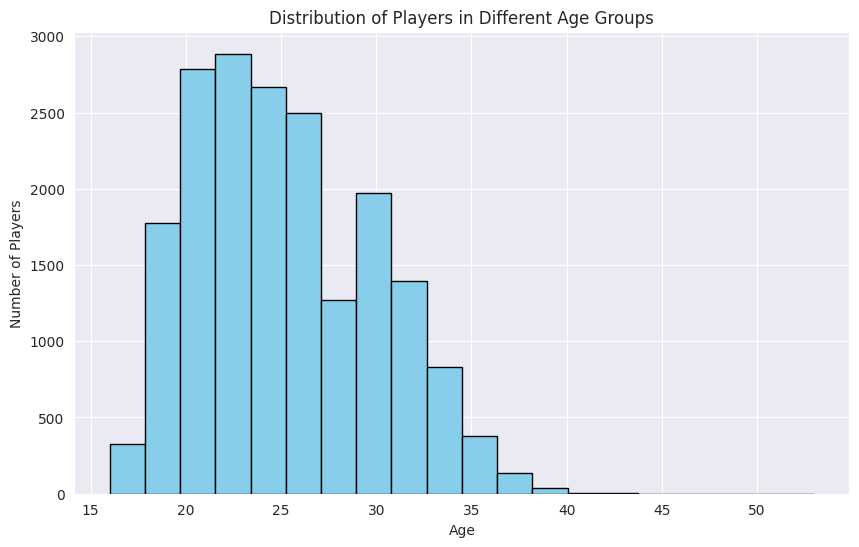

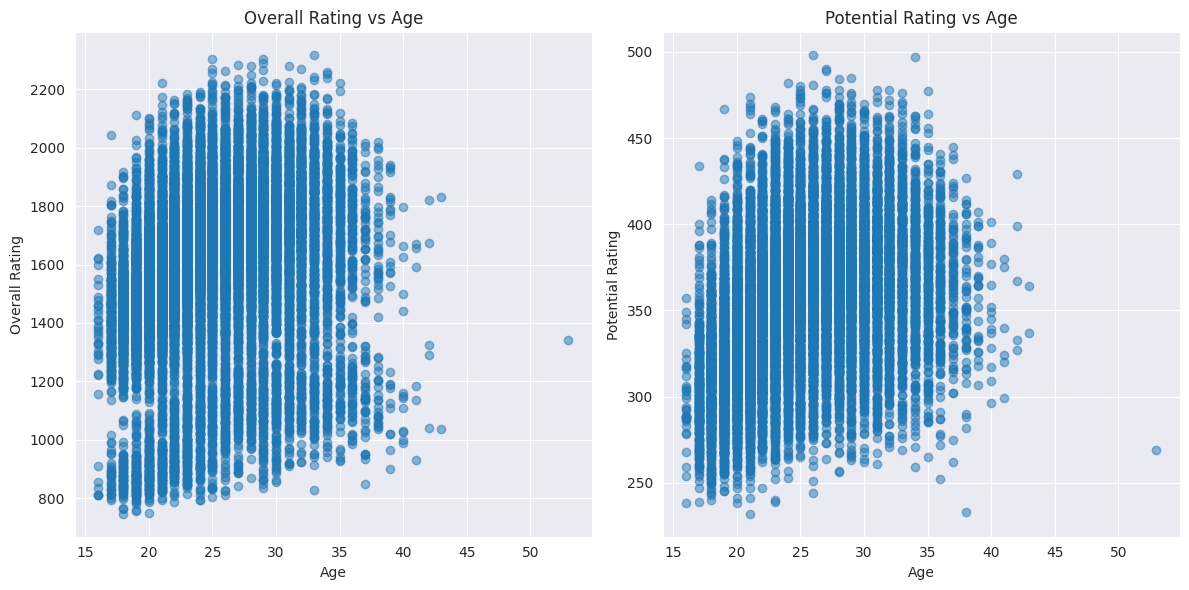

In [ ]:
# prompt: Distributions of Players In Different Age Groups _ Players Overall and Potential Rating vs Age in FIFA 21

import matplotlib.pyplot as plt
# Create a histogram of player ages
plt.figure(figsize=(10, 6))
plt.hist(fifa_df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.title('Distribution of Players in Different Age Groups')
plt.show()

# Create a scatter plot of Overall vs Age and Potential vs Age
plt.figure(figsize=(12, 6))

# Overall vs Age
plt.subplot(1, 2, 1)
plt.scatter(fifa_df['Age'], fifa_df['Total Stats'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.title('Overall Rating vs Age')

# Potential vs Age
plt.subplot(1, 2, 2)
plt.scatter(fifa_df['Age'], fifa_df['Base Stats'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Potential Rating')
plt.title('Potential Rating vs Age')

plt.tight_layout()
plt.show()


In [ ]:
# prompt: Top 15 Players Key Performance Indication

# Top 15 Players Key Performance Indication
top_15_players = fifa_df.sort_values('Total Stats', ascending=False).head(15)
top_15_players[['Name', 'Club', 'Nationality', 'Total Stats', 'Base Stats', 'Positions', 'Age','Value']]


,Name,Club,Nationality,Total Stats,Base Stats,Positions,Age,Value
45,L. Suárez,Atlético Madrid,Uruguay,2316,459,ST,33,€51M
3,K. De Bruyne,Manchester City,Belgium,2304,485,"CAM, CM",29,€129M
34,Bruno Fernandes,Manchester United,Portugal,2303,476,"CAM, CM",25,€105.5M
28,A. Griezmann,FC Barcelona,France,2288,465,"ST, CF, LW",29,€79.5M
106,Alex Telles,Manchester United,Brazil,2282,478,LB,27,€44.5M
150,M. Acuña,Sevilla FC,Argentina,2280,478,"LB, LM",28,€33M
198,Paulinho,Guangzhou Evergrande Taobao FC,Brazil,2279,478,"CM, CAM, CDM",31,€30M
203,R. Nainggolan,Inter,Belgium,2270,478,"CAM, CM, CF",32,€29M
20,J. Kimmich,FC Bayern München,Germany,2269,473,"CDM, RB",25,€103M
96,G. Wijnaldum,Liverpool,Netherlands,2267,475,CM,29,€52.5M
